In [1]:
# Imports #
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

# Constants #
a = 5
m = 2
T = 64
N = 5
w0 = np.sqrt(T/(m*a))
L = (N+1)*a
mode = np.array(range(1, N+1))
k = np.array([(m * np.pi)/L for m in mode])
x = np.linspace(0, np.pi/a, 1000)

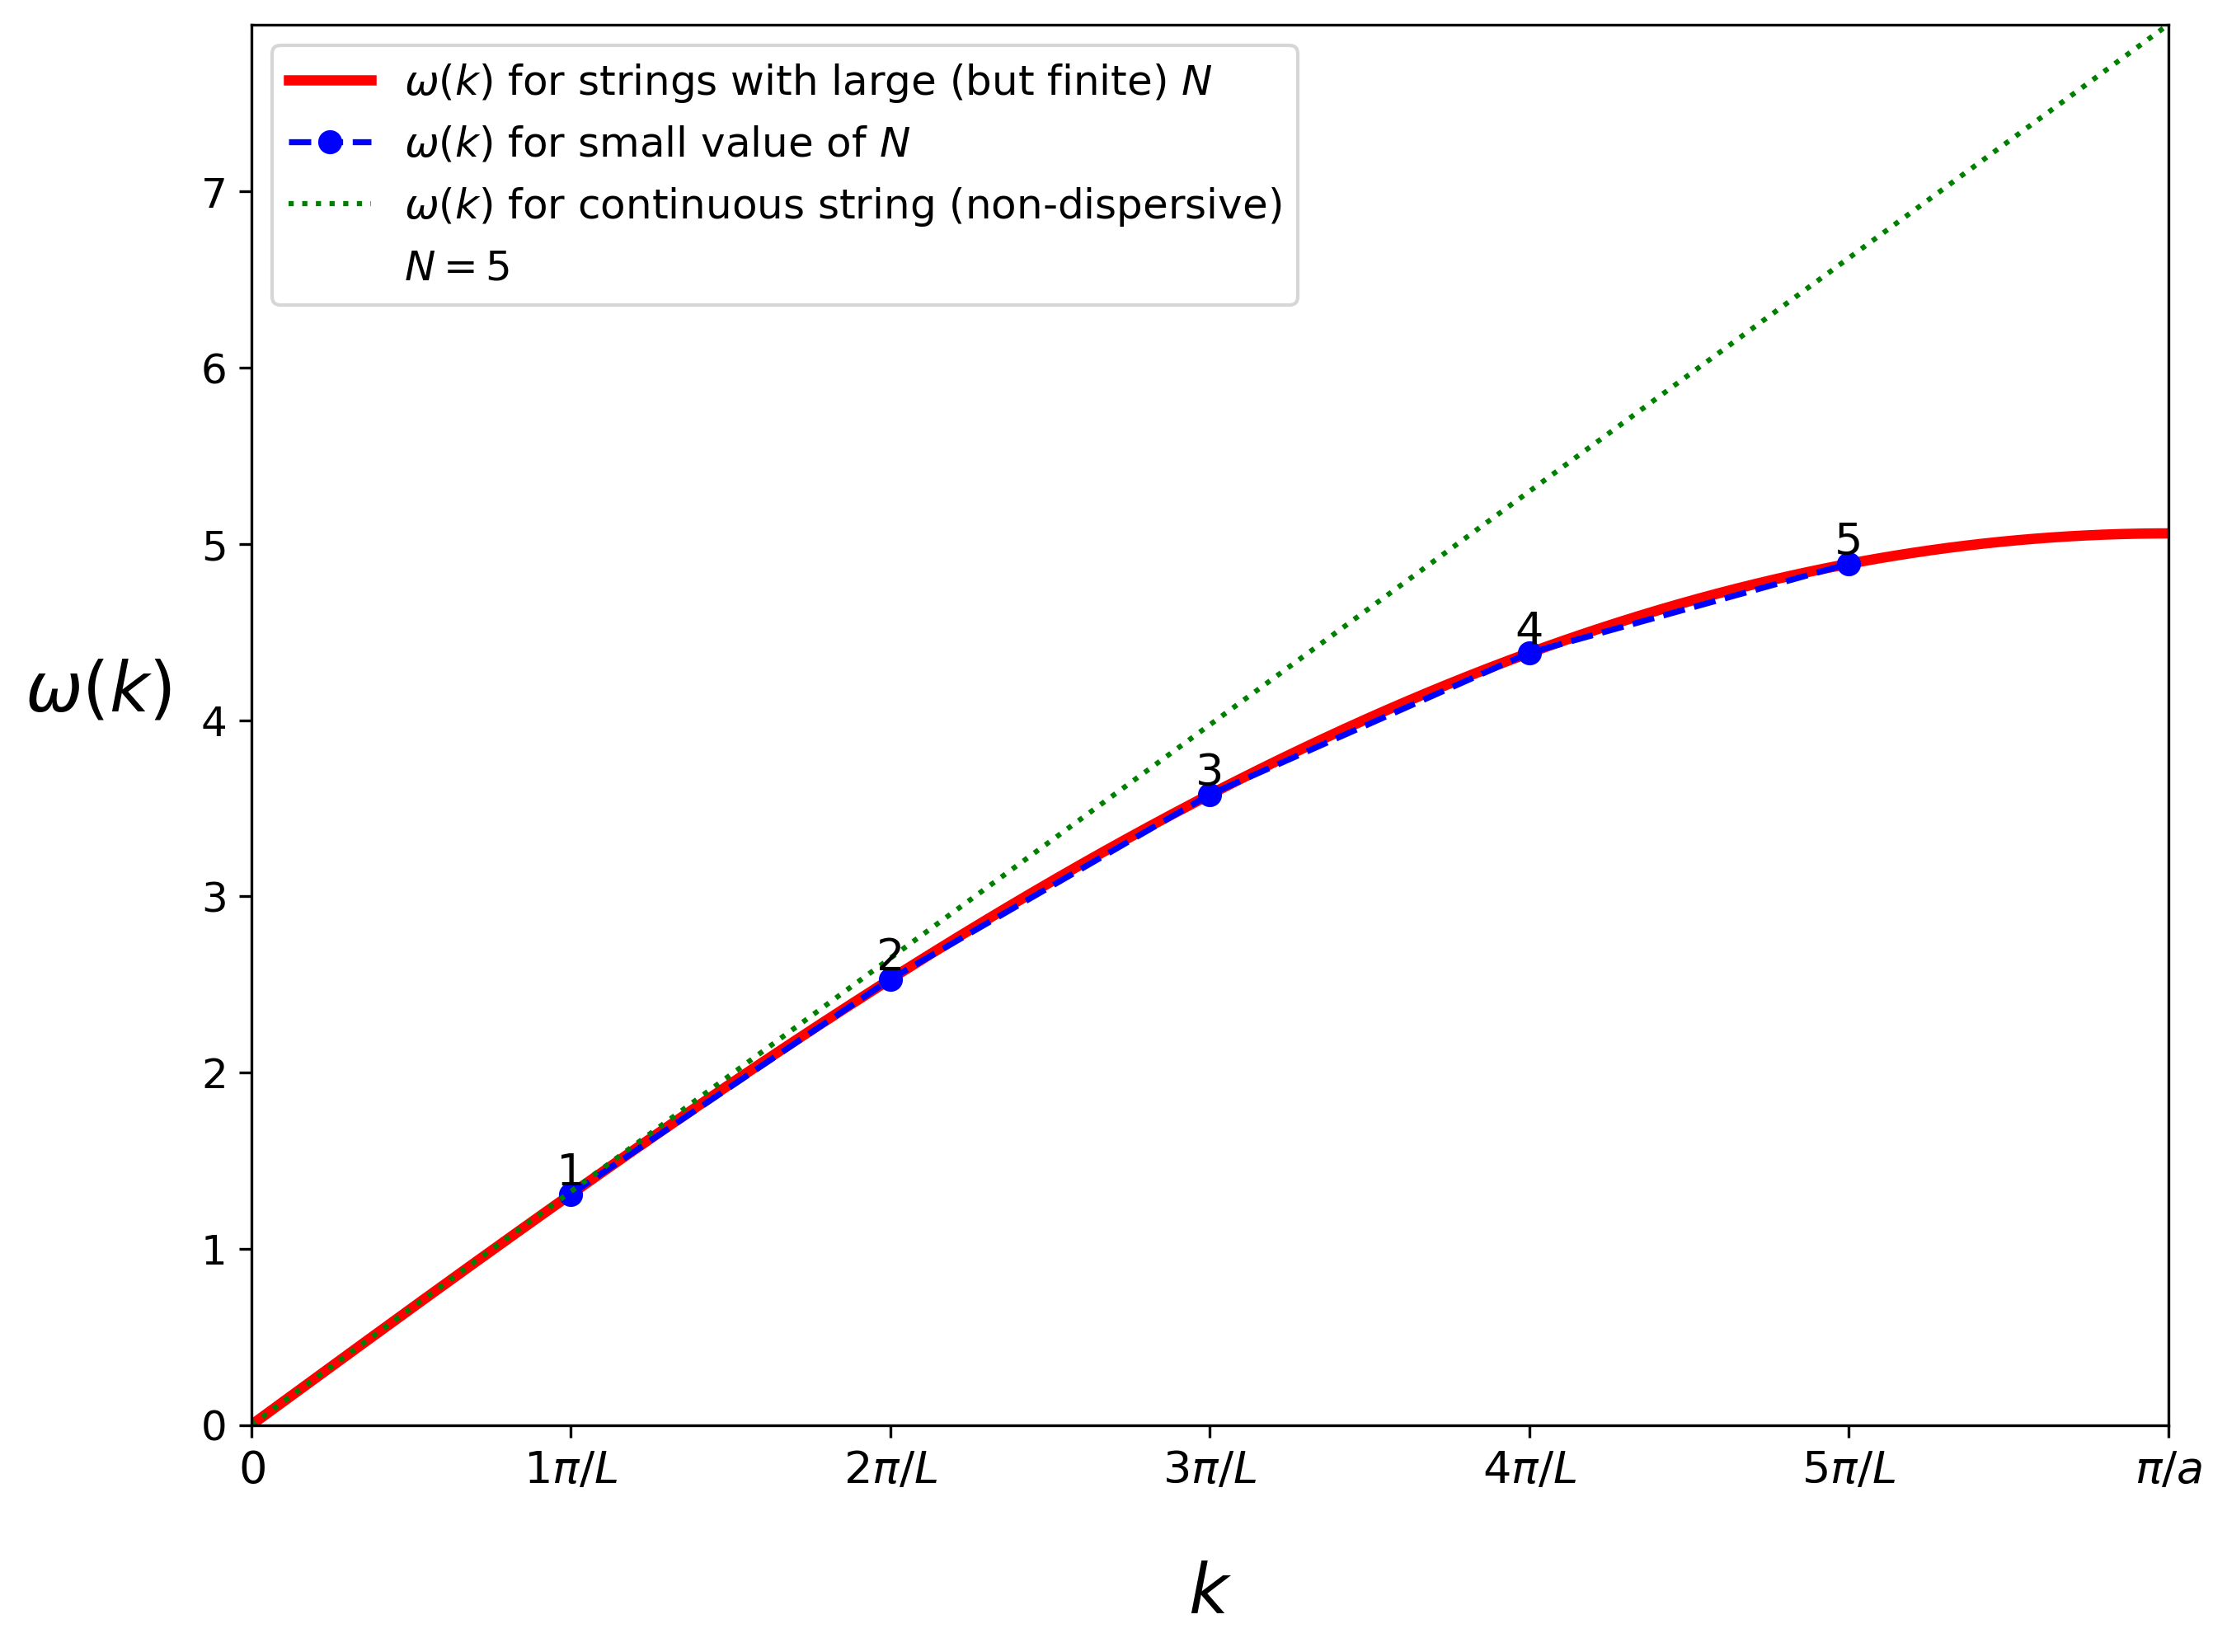

In [2]:
# Defining x-ticks #
def my_ticks(value, tick_number):
    n = int(np.round(L * value / np.pi))
    for i in range(1,N+1):
        if n==i:
            return r"${0} \pi / L$".format(i)
    if n==N+1:
        return r'$\pi / a$'
    elif n==0:
        return r'$0$'


fig, ax = plt.subplots(figsize = (10, 7.5), dpi=300)

# fig.suptitle("Dispersion Relation", fontsize=30)

ax.plot(x, 2*w0*np.sin(x*a/2), c='r', lw = 3, ls='-', label = r'$\omega(k)$' + ' for strings with large (but finite) $N$')
ax.plot(k, 2*w0*np.sin(k*a/2), ls='--', lw = 1.75, c='b', marker='o', label = r"$\omega(k)$" + " for small value of $N$")
ax.plot(x, np.sqrt((T*a)/m)*x, ls=':', c='g', label=r"$\omega(k)$" + ' for continuous string (non-dispersive)')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/L))
ax.xaxis.set_major_formatter(my_ticks)
ax.set_ylabel(r"$\omega(k)$", fontsize=20, rotation=0, labelpad=30)
ax.set_xlabel(r"$k$", fontsize=20, labelpad=20)
ax.set_xlim(0, np.pi/a)
ax.set_ylim(0, np.sqrt((T*a)/m)*np.pi/a)
handles, labels = plt.gca().get_legend_handles_labels()
red_patch = mpatches.Patch(color='w', label=r'$N = {0}$'.format(N))
ax.legend(handles=handles+[red_patch], fontsize=12)

plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
for x, y, text in zip(k, 2*w0*np.sin(k*a/2), mode):
    plt.text(x, y, text, fontsize=13, ha='center', va='bottom')

# plt.savefig("a-02_p-01-03.png")
# plt.savefig("a-02_p-01-03.pdf")
plt.show()

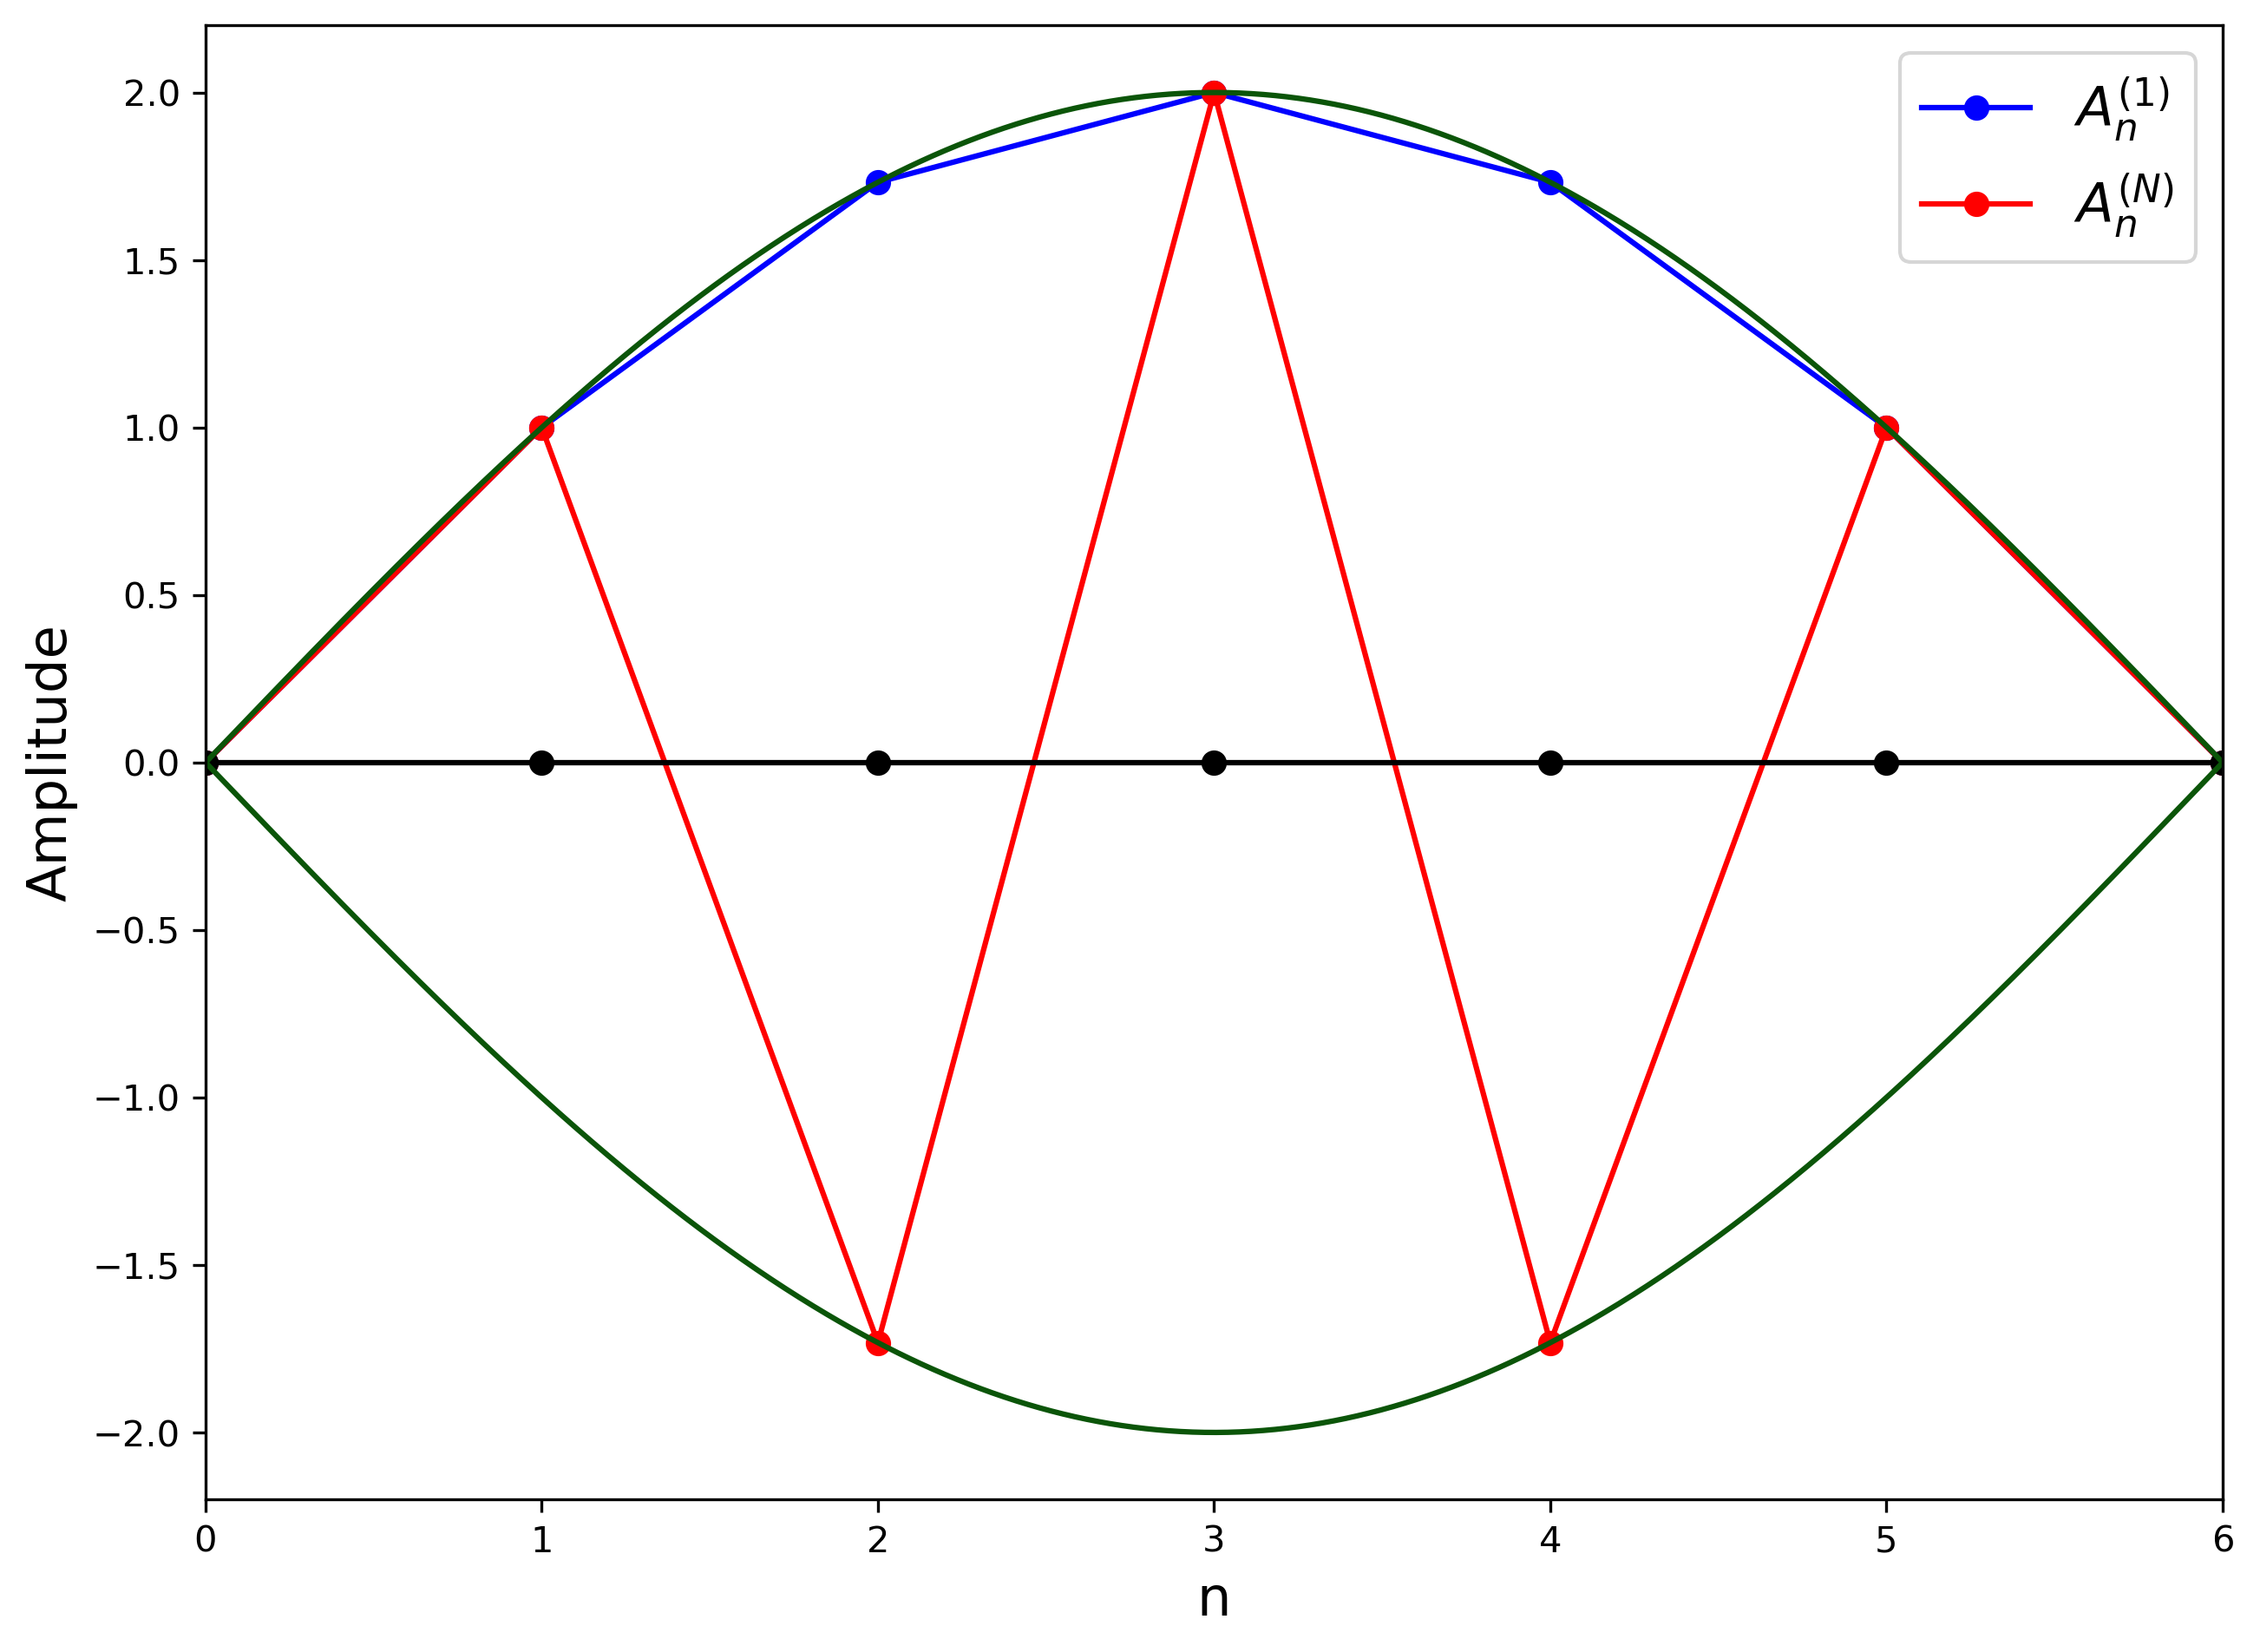

In [3]:
n = np.array(range(0, N+2))
c = 2
x1 = np.linspace(0, N+2, 1000)

@np.vectorize
def x_axis(x):
    return 0

fig, ax = plt.subplots(figsize = (10, 7.5), dpi=300)

ax.plot(n, c*np.sin((n*np.pi)/(N+1)), c='b', marker='o', label=r'$A_n^{(1)}$')
ax.plot(n, np.cos((n-1)*np.pi)*c*np.sin((n*np.pi)/(N+1)), c='r', marker='o', label=r'$A_n^{(N)}$')
ax.plot(n, x_axis(n), c='k', marker='o')
ax.plot(x1, c*np.sin(x1/(N+1)*np.pi), c='xkcd:forest')
ax.plot(x1, -c*np.sin(x1/(N+1)*np.pi), c='xkcd:forest')
ax.set_xlim(0, N+1)
ax.set_xlabel(r"n", fontsize=15)
ax.set_ylabel("Amplitude", fontsize=15)
ax.legend(fontsize=15)

plt.savefig("a-02_p-01-04.png")

plt.show()